# Acidentes de trânsito em rodovias federais

## Integrantes
Jafet de Lima,
Mateus Pereira
e Leandro Queiroz

# Motivação e Obejetivo
Escolhemos esse tema com intuito de trabalhar e entender como acontecem as causas e consequências de transito em rodovias federais, o nosso dataset tem como base dados da policia rodoviária federal e podem ser acessados pelo link: https://www.gov.br/prf/pt-br/acesso-a-informacao/dados-abertos/ usamos como base os datasets com ocorrências de 2022 e 2021 com 51166 linhas e 30 colunas

In [127]:
import seaborn as sns
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import collections
from collections import Counter
pd.options.display.max_columns = None

## Tratamento de dados

In [2]:
datatran2021 = pd.read_csv("https://raw.githubusercontent.com/jafetl/An-lise-sobre-acidentes-de-transito/main/datatran2021.csv" , encoding = "ISO-8859-1", sep = ';')
datatran2022 = pd.read_csv('https://raw.githubusercontent.com/jafetl/An-lise-sobre-acidentes-de-transito/main/datatran2022.csv', encoding = "ISO-8859-1", sep = ';')

In [3]:
longi = collections.UserDict(datatran2021['longitude'])
brlongi = []

for key, value in longi.items():
    value.replace(',', '.')
    brlongi.append(value.replace(',','.'))

    
datatran2021['longitude'] = brlongi

In [4]:
lati = collections.UserDict(datatran2021['latitude'])
brlati = []

for key, value in lati.items():
    value.replace(',', '.')
    brlati.append(value.replace(',','.'))

    
datatran2021['latitude'] = brlati
datatran2021['longitude'] = datatran2021['longitude'].astype(float)
datatran2021['latitude'] = datatran2021['latitude'].astype(float)

In [5]:
#indexando os datasets
df = pd.merge(datatran2021, datatran2022, how = 'outer')

In [6]:
df.data_inversa = df.data_inversa.astype('datetime64[ns]')

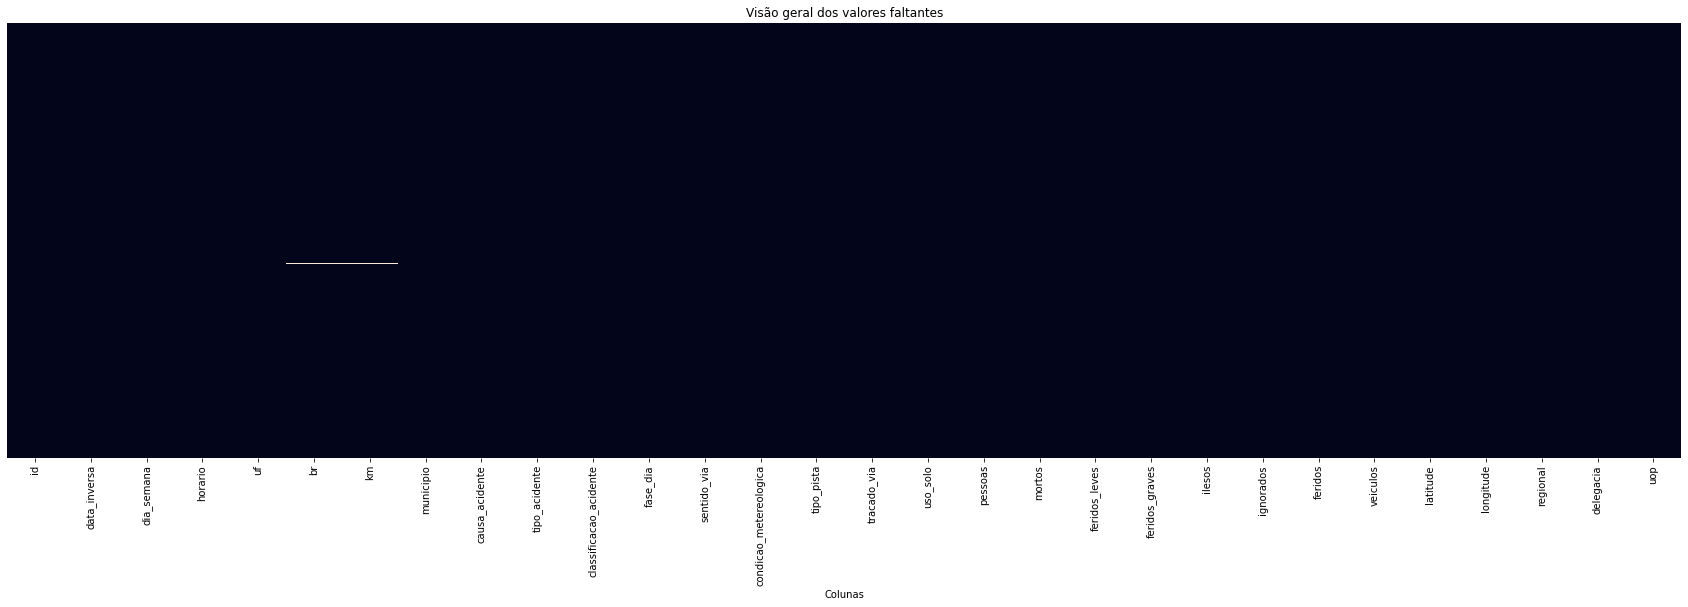

In [7]:
#Verificar dados faltantes
plt.figure(figsize = (30,8))

sns.heatmap(df.isnull(),
            yticklabels = 0,
            cbar = False)

plt.title('Visão geral dos valores faltantes')
plt.xlabel('Colunas')
plt.show()
sns.set(rc={'figure.figsize':(11.7,11)})

In [8]:
#TRATAMENTO EM DADOS FALTANTES
df['br'].fillna(0, inplace=True)
df['km'].fillna(0, inplace=True)
df['uop'].fillna('UOP-NI', inplace=True)

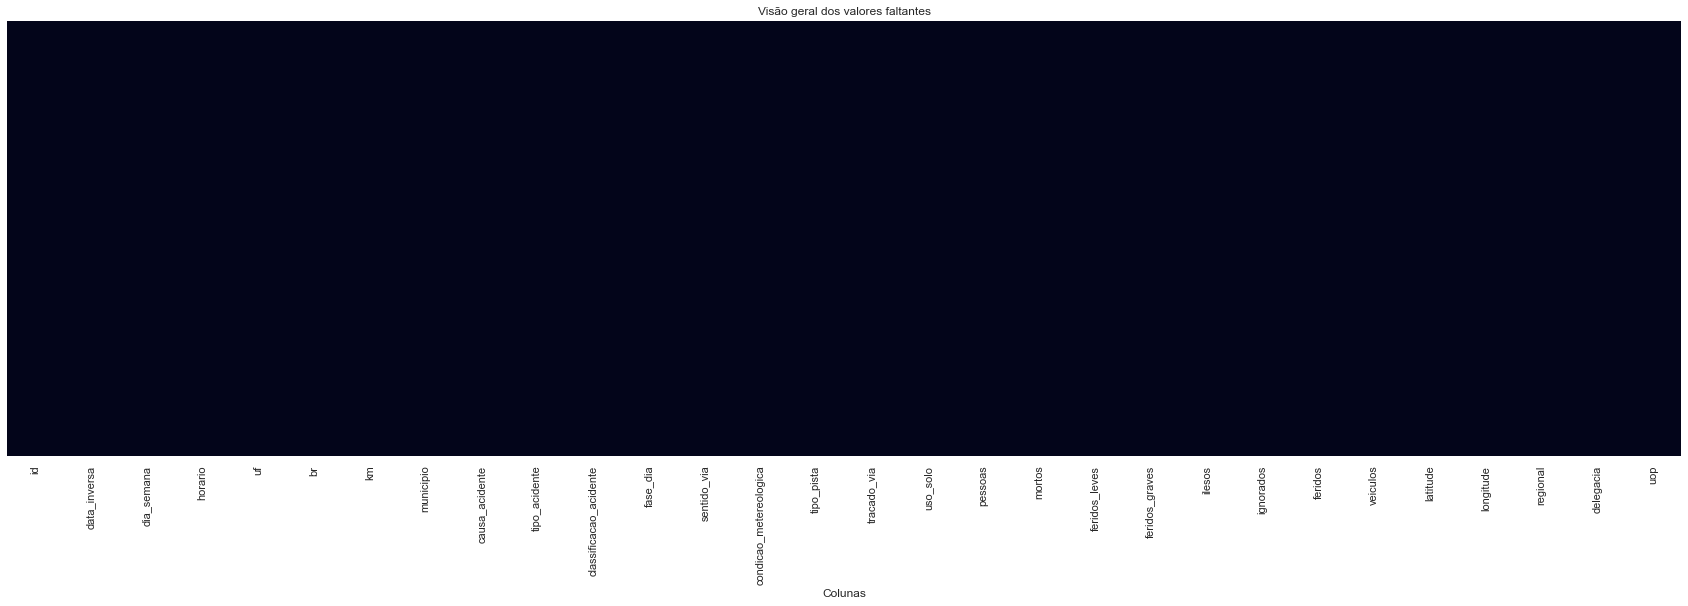

In [9]:
plt.figure(figsize = (30,8))

sns.heatmap(df.isnull(),
            yticklabels = 0,
            cbar = False)

plt.title('Visão geral dos valores faltantes')
plt.xlabel('Colunas')
plt.show()

In [44]:
#Filtrando dados
df_causas = df.query('causa_acidente=="Ingestão de álcool pelo condutor" | causa_acidente == "Velocidade Incompatível" | causa_acidente == "Condutor Dormindo"| causa_acidente == "Demais falhas mecânicas ou elétricas"')
df_pb = df.query('uf=="PB"')
df_velocidade = df.query('causa_acidente == "Velocidade Incompatível"')

## Descreva as princiapais causas de acidentes e suas consequencias

<AxesSubplot:xlabel='count', ylabel='causa_acidente'>

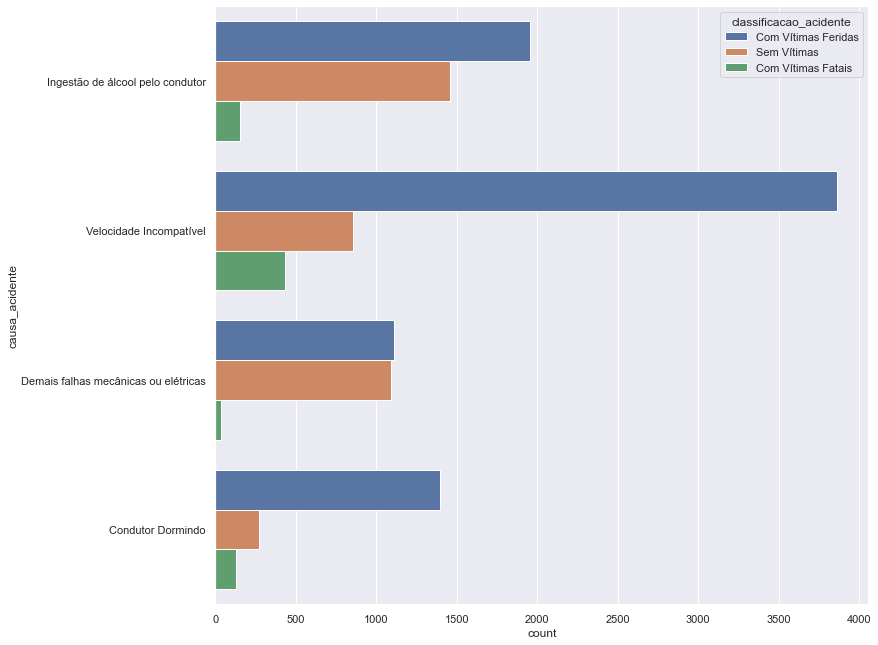

In [11]:
# Acidentes e sua gravidade
sns.countplot(data=df_causas, y= 'causa_acidente', hue = 'classificacao_acidente')

<AxesSubplot:xlabel='count', ylabel='tipo_acidente'>

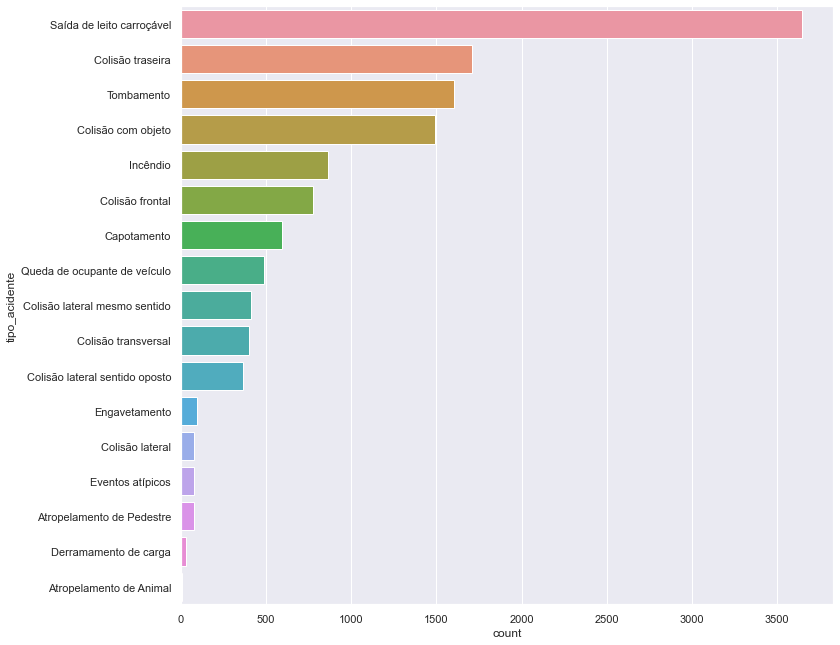

In [22]:
sns.countplot(data=df_causas, y= 'tipo_acidente',
              order = df_causas['tipo_acidente'].value_counts().index)

<AxesSubplot:xlabel='tipo_acidente', ylabel='count'>

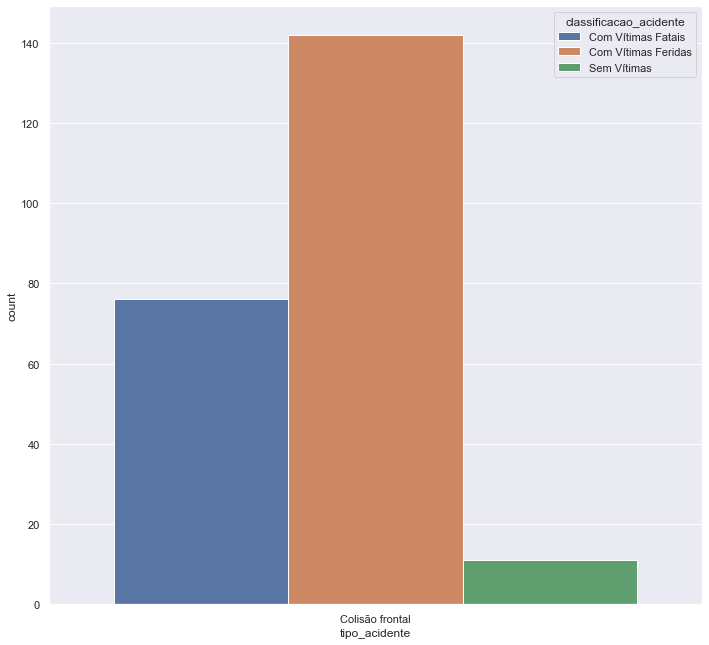

In [15]:
df_velocidade_frontal = df_causas.query('tipo_acidente=="Colisão frontal" & causa_acidente == "Velocidade Incompatível"')
#Número de acidedentes com colisão frontal e gravidade
sns.countplot(data=df_velocidade_frontal, x= 'tipo_acidente', hue ='classificacao_acidente')

<AxesSubplot:xlabel='count', ylabel='tipo_acidente'>

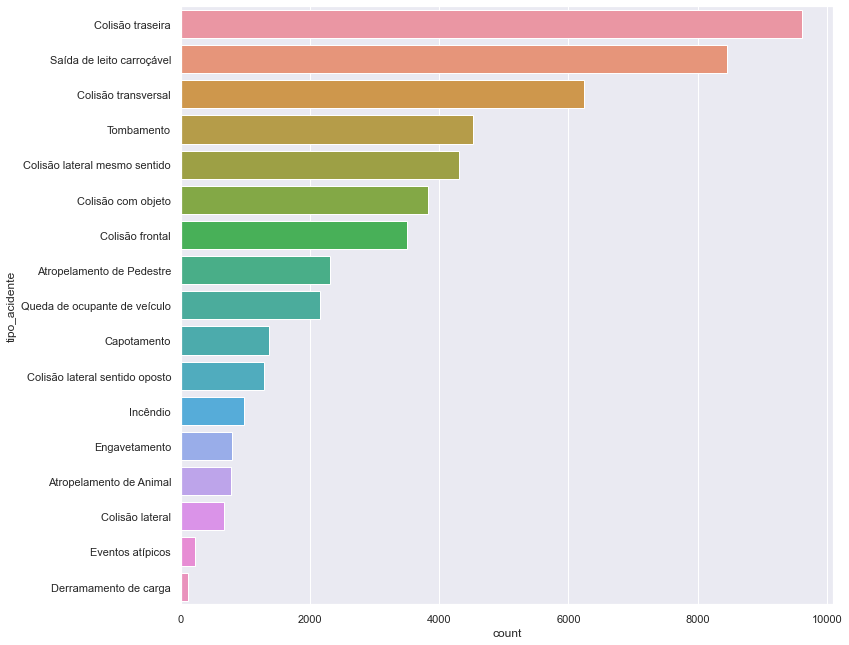

In [91]:
#Tipo acidente no Brasil
sns.countplot(data= df, y= 'tipo_acidente',
              order = df['tipo_acidente'].value_counts().index)

<AxesSubplot:xlabel='count', ylabel='tipo_acidente'>

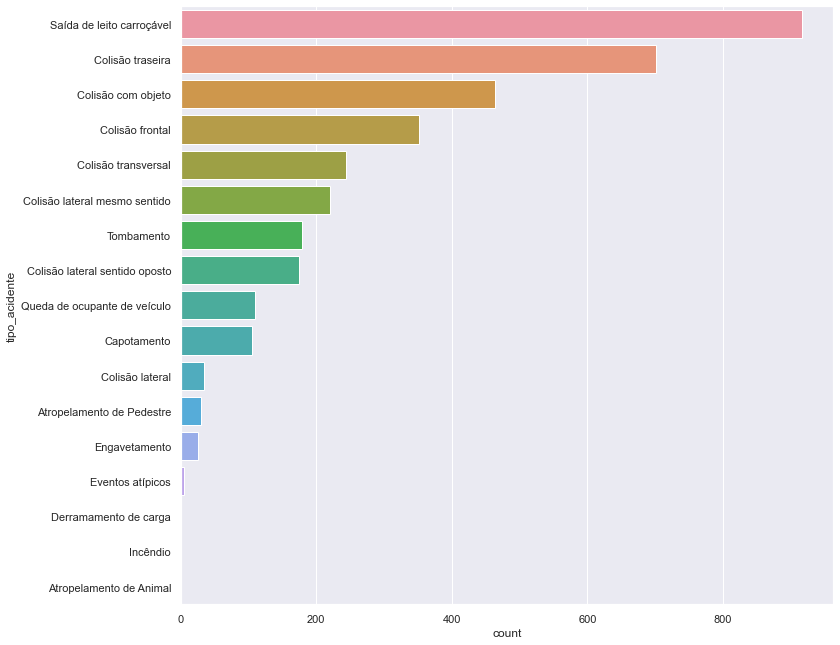

In [93]:
df_alcool = df_causas.query('causa_acidente=="Ingestão de álcool pelo condutor"')
#maiores causas de ingestão de alcool
sns.countplot(data= df_alcool, y= 'tipo_acidente',
              order = df_alcool['tipo_acidente'].value_counts().index)

## Exemplifique os dados em mapas

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

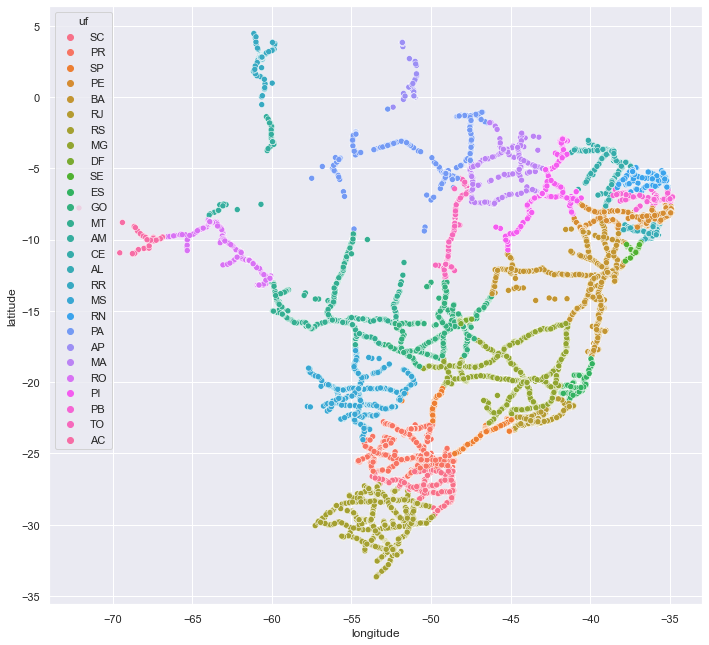

In [98]:
sns.scatterplot(data=df, x="longitude", y="latitude", hue ='uf' )

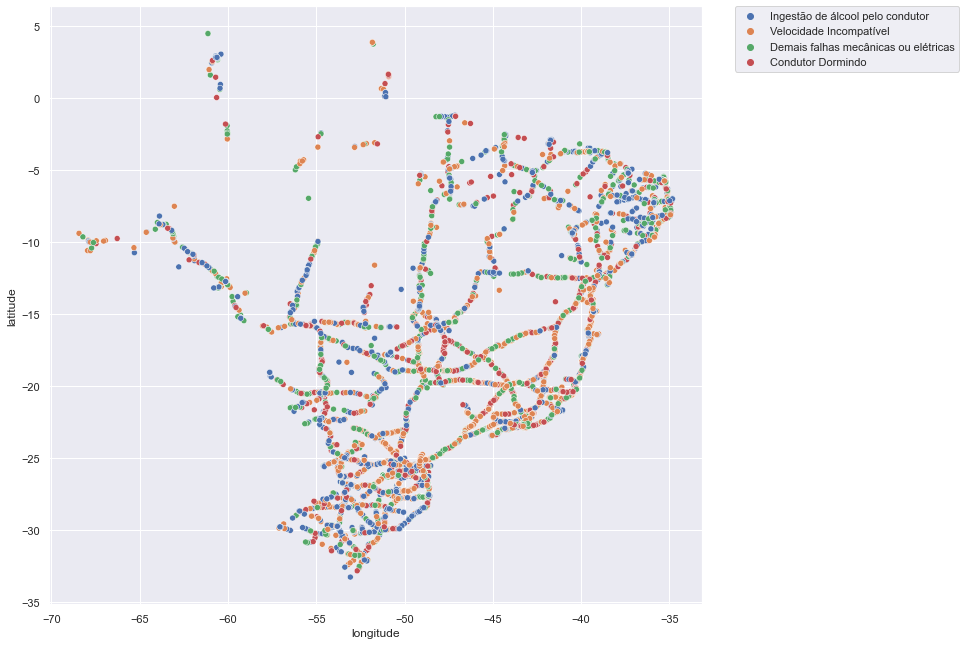

In [99]:
sns.scatterplot(data=df_causas, x="longitude", y="latitude", hue = 'causa_acidente' )
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

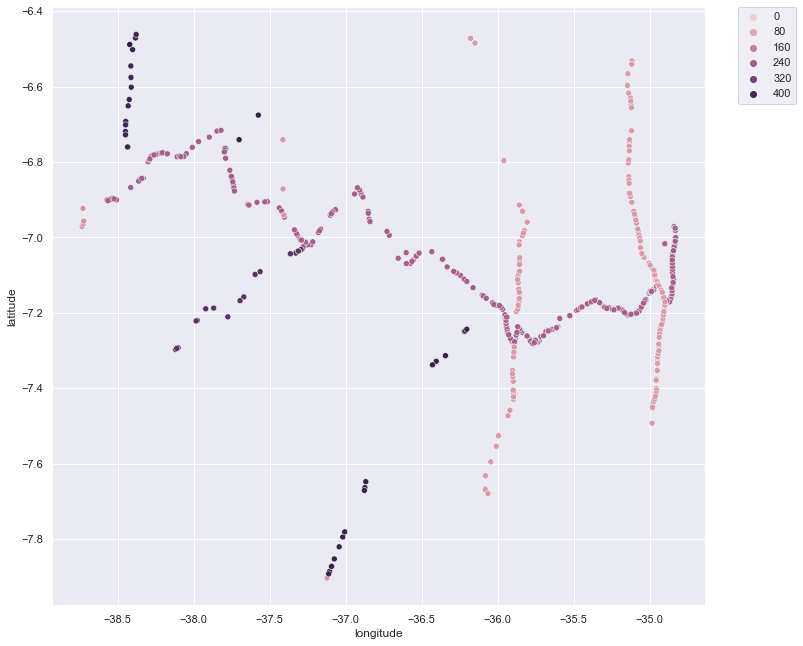

In [126]:
#mapa da Paraiba representado por rodovias federais
sns.scatterplot(data=df_pb, x="longitude", y="latitude", hue = 'br' )
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [88]:
df_230 = df_pb.query('br== 230.0')

<AxesSubplot:xlabel='count', ylabel='causa_acidente'>

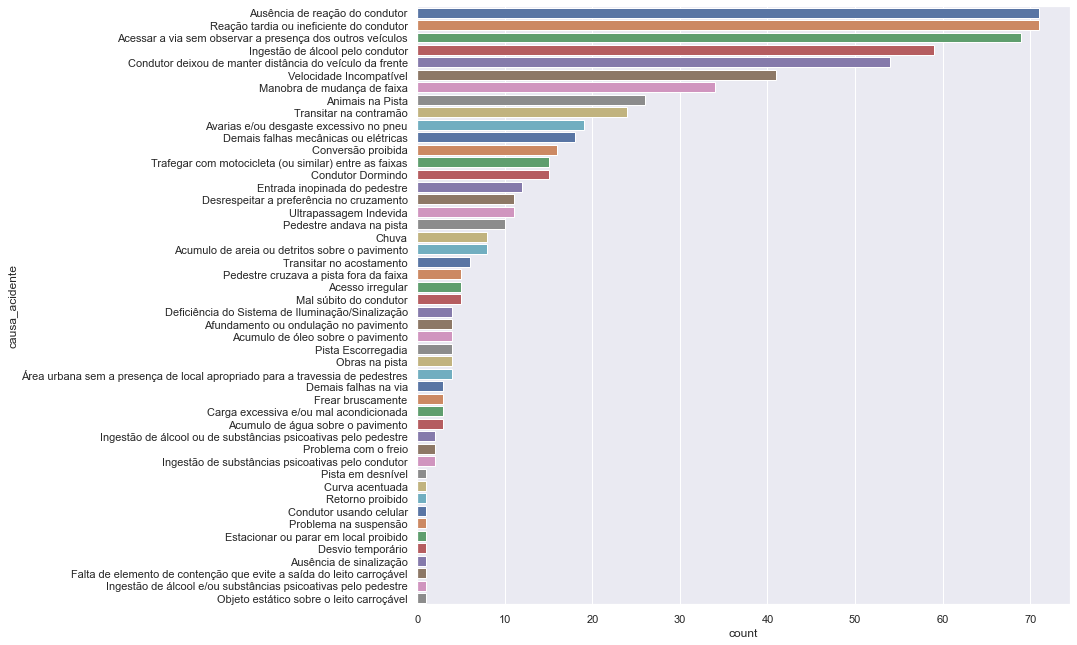

In [124]:
#Tipos de acidente na br 230
sns.countplot(data= df_230, y= 'causa_acidente',palette = 'deep',
              order = df_230['causa_acidente'].value_counts().index)

In [116]:
problemas_pista = []
for i in df['causa_acidente']:
    if (i == 'Retorno proibido' 
        or i == 'Falta de acostamento' 
        or i == 'Declive acentuado' 
        or i == 'Sinalização encoberta' 
        or i == 'Sinalização mal posicionada' 
        or i == 'Afundamento ou ondulação no pavimento' 
        or i == 'Ausência de sinalização'
        or i == 'Iluminação deficiente'
        or i == 'Acostamento em desnível'
        or i == 'Pista Escorregadia'
        or i == 'Transitar no acostamento'
        or i == 'Curva acentuada'):
            problemas_pista.append('Sim')
            
    else:
        problemas_pista.append('Não')

problema_pista = pd.Series(problemas_pista)
df['problema_pista'] = problema_pista

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

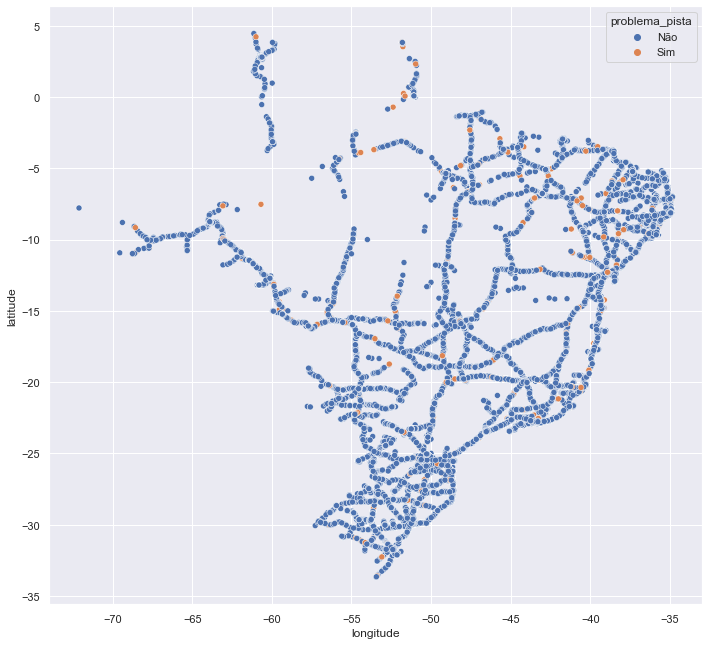

In [118]:
#acidentes que tiveram problema na pista
sns.scatterplot(data=df, x="longitude", y="latitude", hue = 'problema_pista' )

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

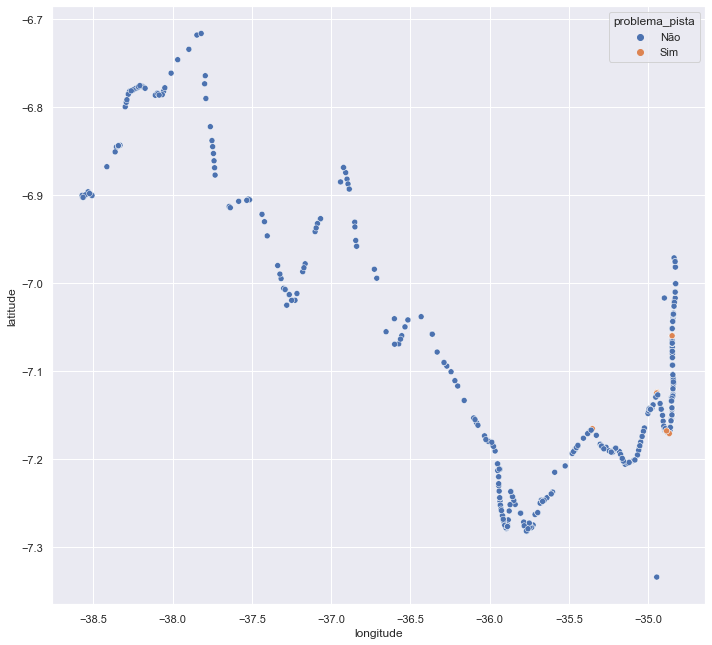

In [120]:
#acidentes que tiveram problema na pista, br230 Paraiba
sns.scatterplot(data=df_230, x="longitude", y="latitude", hue = 'problema_pista',palette = 'deep' )

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

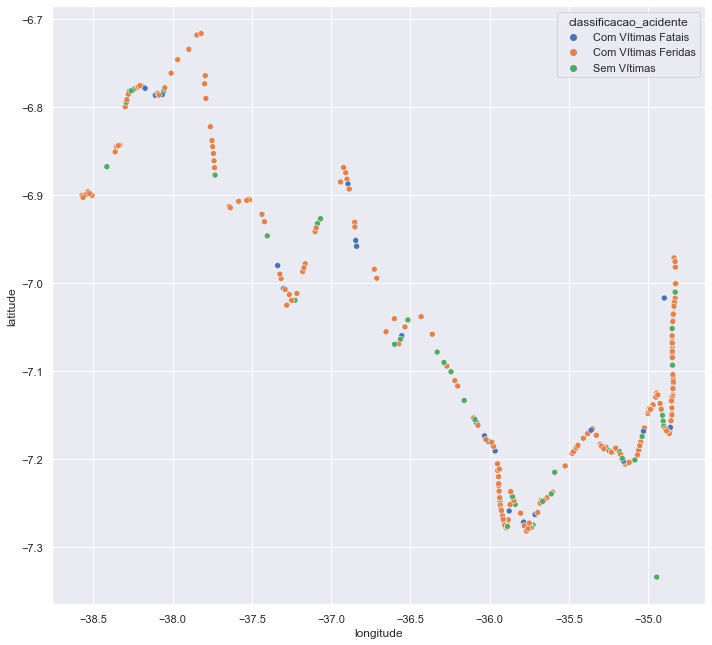

In [121]:
#Gravidade dos acidentes na br230
sns.scatterplot(data=df_230, x="longitude", y="latitude", hue = 'classificacao_acidente',palette = 'deep' )

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

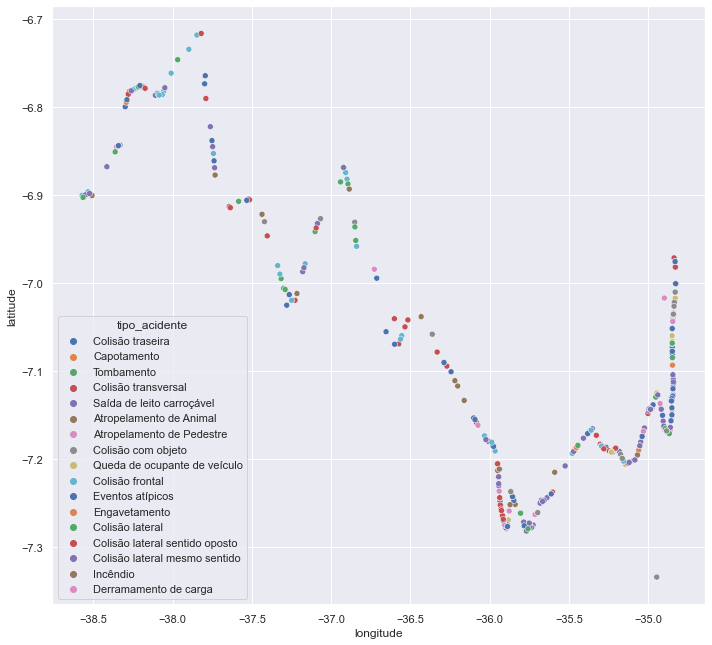

In [122]:
#tipos de acidente na br 230
sns.scatterplot(data=df_230, x="longitude", y="latitude", hue = 'tipo_acidente',palette = 'deep' )

<AxesSubplot:xlabel='tipo_pista', ylabel='count'>

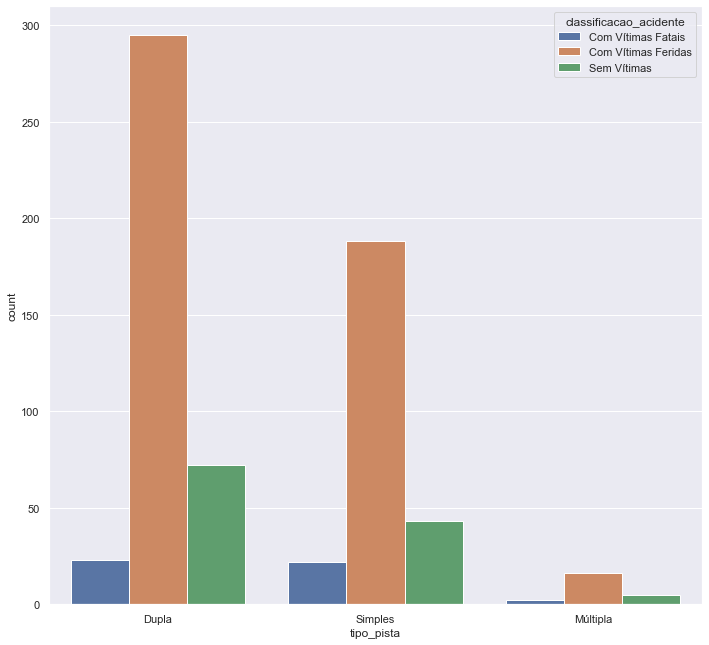

In [123]:
#Acidentes com o tipo de pista na br 230
sns.countplot(data = df_230, x = "tipo_pista", hue = 'classificacao_acidente')

In [28]:
import folium
from folium import plugins


In [64]:
mapa = folium.Map(location= ['-6.946068', '-35.094938'])


In [65]:
lista_de_tuplas = list(zip(df_101['latitude'],df_101['longitude']))
loc = pd.DataFrame(lista_de_tuplas, columns=['latitude', 'longitude'])
loc

,latitude,longitude
0,-7.168499,-35.370274
1,-7.166300,-35.360000
2,-7.165100,-34.894100
3,-6.975300,-34.831800
4,-7.177500,-36.024700
...,...,...
661,-7.059600,-34.850600
662,-7.010000,-34.831200
663,-7.143200,-34.986900
664,-7.180600,-35.987300


In [66]:
loc = loc.values.tolist()

In [67]:
loc_size = len(loc)
loc_size

666

In [83]:
for point in range (0,loc_size):
    folium.Marker(loc[point]).add_to(mapa)

In [129]:
mapa

# Usando agrupamentos defina as regiões do Brasil

In [128]:
from sklearn.cluster import KMeans

In [36]:
kmeans = KMeans(n_clusters=5)

In [37]:
input_data = df[['latitude', 'longitude']]

In [38]:
kmeans.fit(input_data)

KMeans(n_clusters=5)

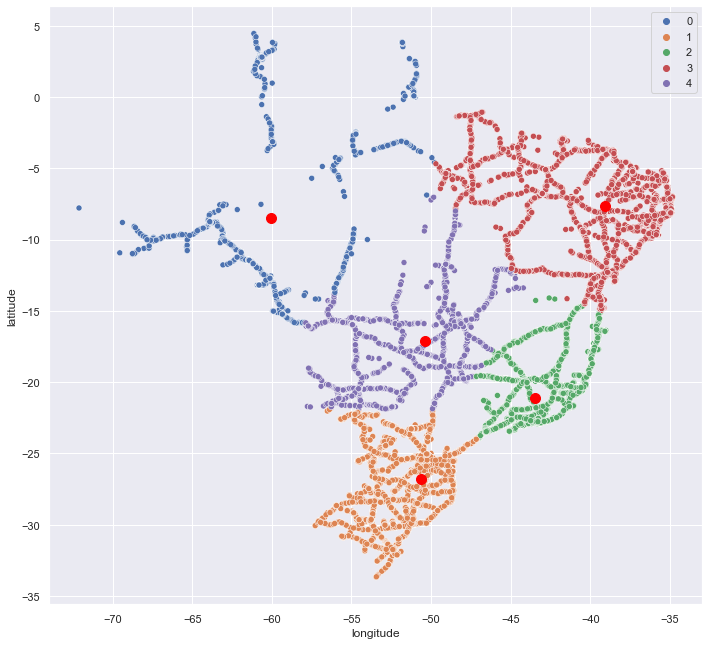

In [96]:
sns.scatterplot(data=input_data, x="longitude", y="latitude", hue=kmeans.labels_, palette = 'deep')
plt.scatter(kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,0], s = 100, c = 'red', alpha = 1)

# Conclusão e Melhorias

• Usando o nosso dataset podemos tirar varias conclusões de cada coluna, porem iremos elencar uma 
que aborda o a análise em geral. Vemos uma quantidade significativa de acidentes provocados por ações e falhas
humanas percebemos também que rodovias federais tem poucos acidentes causados por
problemas de estrutura por exemplo buracos, falta de sinalização e entre outros.

• Do ponto de vista de vista da análise temos que aperfeiçoar os nossos mapas para uma
análise mais precisa para entender e apresentar melhorias para resolver problemas.
